In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [39]:
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()
df1 = pd.DataFrame(iris.data[:, :5]) #.append(pd.DataFrame(iris.target))
df2 = pd.DataFrame(iris.target, columns = ['col_4'])
df = pd.concat([df1,df2], axis = 1)
s = df.groupby('col_4')
s.count()

,0,1,2,3
col_4,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


In [40]:
class Perceptron(object):

    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        print(self.w_)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            
            for xi,  target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        print(self.errors_)
        print(self)
        return self
    
    def __repr__(self):
        return "<Perceptron epochs:%s errors:%s weights:%s>" % (self.n_iter, self.errors_, self.w_)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

class AdalineGD(object):

    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            print(self.cost_)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

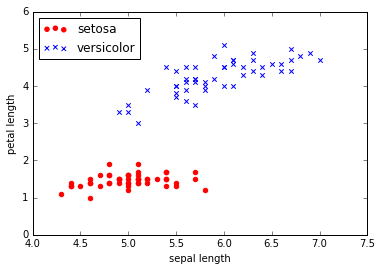

In [41]:
y = df.iloc[0:100, 4].values
y = np.where(y ==  1, -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc = 'upper left')
plt.show()

[ 0.  0.  0.]
[1, 3, 3, 2, 1, 0, 0, 0, 0, 0]
<Perceptron epochs:10 errors:[1, 3, 3, 2, 1, 0, 0, 0, 0, 0] weights:[ 0.04   0.07  -0.184]>


<function matplotlib.pyplot.show>

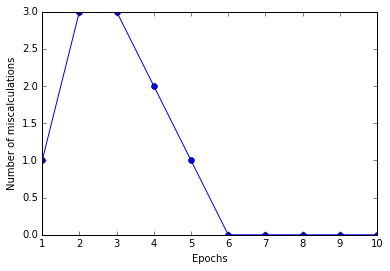

In [31]:
ppn = Perceptron(eta = 0.01, n_iter = 10).fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of miscalculations')
plt.show

[50.0]
[50.0, 1006.3894403778448]
[50.0, 1006.3894403778448, 105804.66795210178]
[50.0, 1006.3894403778448, 105804.66795210178, 11155739.195249896]
[50.0, 1006.3894403778448, 105804.66795210178, 11155739.195249896, 1176261261.8390045]
[50.0, 1006.3894403778448, 105804.66795210178, 11155739.195249896, 1176261261.8390045, 124025032495.86548]
[50.0, 1006.3894403778448, 105804.66795210178, 11155739.195249896, 1176261261.8390045, 124025032495.86548, 13077204208460.236]
[50.0, 1006.3894403778448, 105804.66795210178, 11155739.195249896, 1176261261.8390045, 124025032495.86548, 13077204208460.236, 1378860915996732.8]
[50.0, 1006.3894403778448, 105804.66795210178, 11155739.195249896, 1176261261.8390045, 124025032495.86548, 13077204208460.236, 1378860915996732.8, 1.4538714815157216e+17]
[50.0, 1006.3894403778448, 105804.66795210178, 11155739.195249896, 1176261261.8390045, 124025032495.86548, 13077204208460.236, 1378860915996732.8, 1.4538714815157216e+17, 1.5329626507230206e+19]
[50.0, 1006.389440

<function matplotlib.pyplot.show>

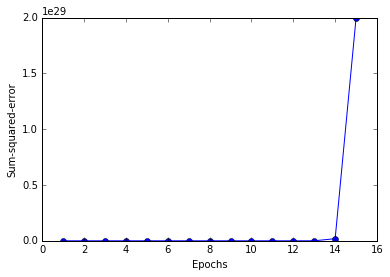

In [42]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,0] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada = AdalineGD(n_iter = 15, eta = 0.01).fit(X_std, y)
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show